In [31]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(os.path.dirname(current_dir))
sys.path.insert(0, parent_dir) 

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from Evaluation import get_metrics
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## Set Path

In [33]:
# path = 'C:/Users/robin.opdam/Google Drive/Thesis (Msc)/Thesis_shared_files/'
path = '/Users/Robin/Google Drive/Thesis (Msc)/Thesis_shared_files/'
# path = '../'

## Set params based on top 3 GS results
- ML: Final run for GS iloc 52
- Am_like_ML: Final run for GS iloc 103
- Am_20k_users: Final run for GS iloc 106

In [34]:
file_names = ['ml_1m', 'am_like_ml', 'am_20k_users']

In [35]:
pd.read_pickle(path + 'Logs/GS/' + file_names[0] + '_bpr_gs_log').sort_values('val_rec@10', ascending=False).iloc[:3]

,all_val_rec@10,learning_rate,train_loss,val_auc,p,q,train_time,total_test_rec,test_rec@10,total_val_rec,val_rec@10,nolf,n_iterations,sample_size,seed,alpha,rho,sigma,reg_user,reg_item
52,"[0.006, 0.012, 0.026, 0.044, 0.054, 0.054, 0.0...","[0.05, 0.05500000000000001, 0.0605000000000000...","[0.6933242666315576, 0.6926984396546145, 0.690...",[],0,0,157.581866,0.252,0.053,0.396,0.092,8,25,99870.9,1234,0.05,1.1,0.5,0.001,0.001
1,"[0.012, 0.036, 0.046, 0.056, 0.06, 0.058, 0.06...","[0.03, 0.033, 0.036300000000000006, 0.03993000...","[0.6928840096669814, 0.6885358726376268, 0.611...",[],0,0,344.870444,0.258,0.056,0.394,0.088,8,25,299612.7,1234,0.03,1.1,0.5,0,0
25,"[0.012, 0.036, 0.046, 0.056, 0.06, 0.056, 0.06...","[0.03, 0.033, 0.036300000000000006, 0.03993000...","[0.692902805095172, 0.6885848778872211, 0.6122...",[],0,0,332.730996,0.257,0.057,0.390,0.086,8,25,299612.7,1234,0.03,1.1,0.5,0.0001,0.0001


In [36]:
ml_1m_params = {
"nolf": 8, #Size of latent feature vectors
"n_iterations": 25, #around 20 is sufficient
"sample_size": 0,
"seed": 0,
"alpha": 0.05, # Learning rate: Amazon_01 best: 0.08
"rho": 1.05, # Bold driver increase alpha
"sigma": 0.55, # Bold driver decrease alpha
          
"reg_user": 0.001, # Am_40k best: 0.1 # ML_1 best: 0
"reg_item": 0.001, # Am_40k best: 0.1 # ML_1 best: 0
}

In [37]:
pd.read_pickle(path + 'Logs/GS/' + file_names[1] + '_bpr_gs_log').sort_values('val_rec@10', ascending=False).iloc[:3]

,all_val_rec@10,learning_rate,train_loss,val_auc,p,q,train_time,total_test_rec,test_rec@10,total_val_rec,val_rec@10,nolf,n_iterations,sample_size,seed,alpha,rho,sigma,reg_user,reg_item
103,"[0.0, 0.028, 0.052, 0.058, 0.064, 0.064, 0.066...","[0.05, 0.05500000000000001, 0.0605000000000000...","[0.7078283074211197, 0.7043634231225636, 0.698...",[],0,0,201.563646,0.255,0.057,0.328,0.072,8,25,141918.4,1234,0.05,1.1,0.5,0.1,0.1
102,"[0.0, 0.0, 0.02, 0.052, 0.052, 0.058, 0.064, 0...","[0.05, 0.05500000000000001, 0.0605000000000000...","[0.7084648622120531, 0.706211066744104, 0.7042...",[],0,0,151.683184,0.237,0.056,0.278,0.070,8,25,88699.0,1234,0.05,1.1,0.5,0.1,0.1
114,"[0.0, 0.054, 0.06, 0.064, 0.07, 0.066, 0.068, ...","[0.12, 0.132, 0.14520000000000002, 0.159720000...","[0.7073379463771455, 0.7014502394575847, 0.691...",[],0,0,91.853372,0.244,0.059,0.280,0.070,8,25,88699.0,1234,0.12,1.1,0.5,0.1,0.1


In [38]:
am_like_ml_params = {
"nolf": 8, #Size of latent feature vectors
"n_iterations": 25, #around 20 is sufficient
"sample_size": 0,
"seed": 0,
"alpha": 0.05, # Learning rate: Amazon_01 best: 0.08
"rho": 1.05, # Bold driver increase alpha
"sigma": 0.55, # Bold driver decrease alpha
          
"reg_user": 0.1, # Am_40k best: 0.1 # ML_1 best: 0
"reg_item": 0.1, # Am_40k best: 0.1 # ML_1 best: 0
}

In [39]:
pd.read_pickle(path + 'Logs/GS/' + file_names[2] + '_bpr_gs_log').sort_values('val_rec@10', ascending=False).iloc[:3]

,all_val_rec@10,learning_rate,train_loss,val_auc,p,q,train_time,total_test_rec,test_rec@10,total_val_rec,val_rec@10,nolf,n_iterations,sample_size,seed,alpha,rho,sigma,reg_user,reg_item
106,"[0.0, 0.002, 0.002, 0.004, 0.004, 0.012, 0.014...","[0.08, 0.08800000000000001, 0.0968000000000000...","[0.7028022158299345, 0.7002523820573175, 0.698...",[],0,0,211.055301,0.358,0.076,0.300,0.068,8,25,89654.5,1234,0.08,1.1,0.5,0.1,0.1
111,"[0.0, 0.002, 0.006, 0.012, 0.014, 0.016, 0.022...","[0.1, 0.11000000000000001, 0.12100000000000002...","[0.7016037726067214, 0.6973218579632386, 0.693...",[],0,0,269.485003,0.356,0.075,0.294,0.066,8,25,143447.2,1234,0.10,1.1,0.5,0.1,0.1
115,"[0.0, 0.008, 0.014, 0.014, 0.014, 0.022, 0.026...","[0.12, 0.132, 0.14520000000000002, 0.159720000...","[0.701224759533765, 0.6964060667390694, 0.6919...",[],0,0,260.469640,0.345,0.074,0.308,0.064,8,25,143447.2,1234,0.12,1.1,0.5,0.1,0.1


In [40]:
am_20k_users_params = {
"nolf": 8, #Size of latent feature vectors
"n_iterations": 25, #around 20 is sufficient
"sample_size": 0,
"seed": 0,
"alpha": 0.08, # Learning rate: Amazon_01 best: 0.08
"rho": 1.05, # Bold driver increase alpha
"sigma": 0.55, # Bold driver decrease alpha
          
"reg_user": 0.1, # Am_40k best: 0.1 # ML_1 best: 0
"reg_item": 0.1, # Am_40k best: 0.1 # ML_1 best: 0
}

---
# BPR Final Runs

In [39]:
data_paths = ['Data/ML/', 'Data/Amazon/', 'Data/Amazon/']
sample_percs = [0.8, 0.5]
params = [am_like_ml_params, am_20k_users_params]

n_runs = 30

steps = 5
rank_at = 20

In [ ]:
from BPR import BPR
for data_path, file_name, sample_perc, bpr_params in zip(data_paths, file_names, sample_percs, params):
    df = pd.read_pickle(path + data_path + file_name)
    total_items = df.item_id.nunique()
    total_users = df.user_id.nunique()

    train_set_mf = pd.read_pickle(path + data_path + file_name + '_train_mf')
    val_set_mf = pd.read_pickle(path + data_path + file_name + '_val_mf')
    test_set_mf = pd.read_pickle(path + data_path + file_name + '_test_mf')
    
    bpr_params['sample_size'] = sample_perc * len(train_set_mf)
    
    for i in range(n_runs):
        print(f'run: {i}')
        bpr = BPR(total_users, total_items, bpr_params)
        samples_name = file_name + '_bpr_samples'
        sample_path = path + data_path + 'Samples/' + samples_name + '_' + str(sample_perc) + '.npy'
        bpr.train_model(sample_path = sample_path, 
                        train_set=train_set_mf, 
                        val_set=val_set_mf,
                        verbose=0,
                        patience=10,
                        save_best=True)
        ranked_df_bpr = bpr.get_predictions(train_set_mf, test_set_mf, stats=False)
        bpr_metrics = get_metrics(ranked_df_bpr, steps, rank_at, stats=False)
        other_info = {'metrics':bpr_metrics, 'file_name':file_name}

        bpr.store_model(path + '/Logs/final/', file_name + '_bpr_log', other_info)

In [182]:
res_path = path + '/Logs/final/' + file_names[0] + '_bpr_log'
# pd.read_pickle(res_path)

In [183]:
from Evaluation import get_final_results
res_path = path + '/Logs/final/' + file_names[0] + '_bpr_log'
final_metrics, train_stats, train_time = get_final_results(res_path)

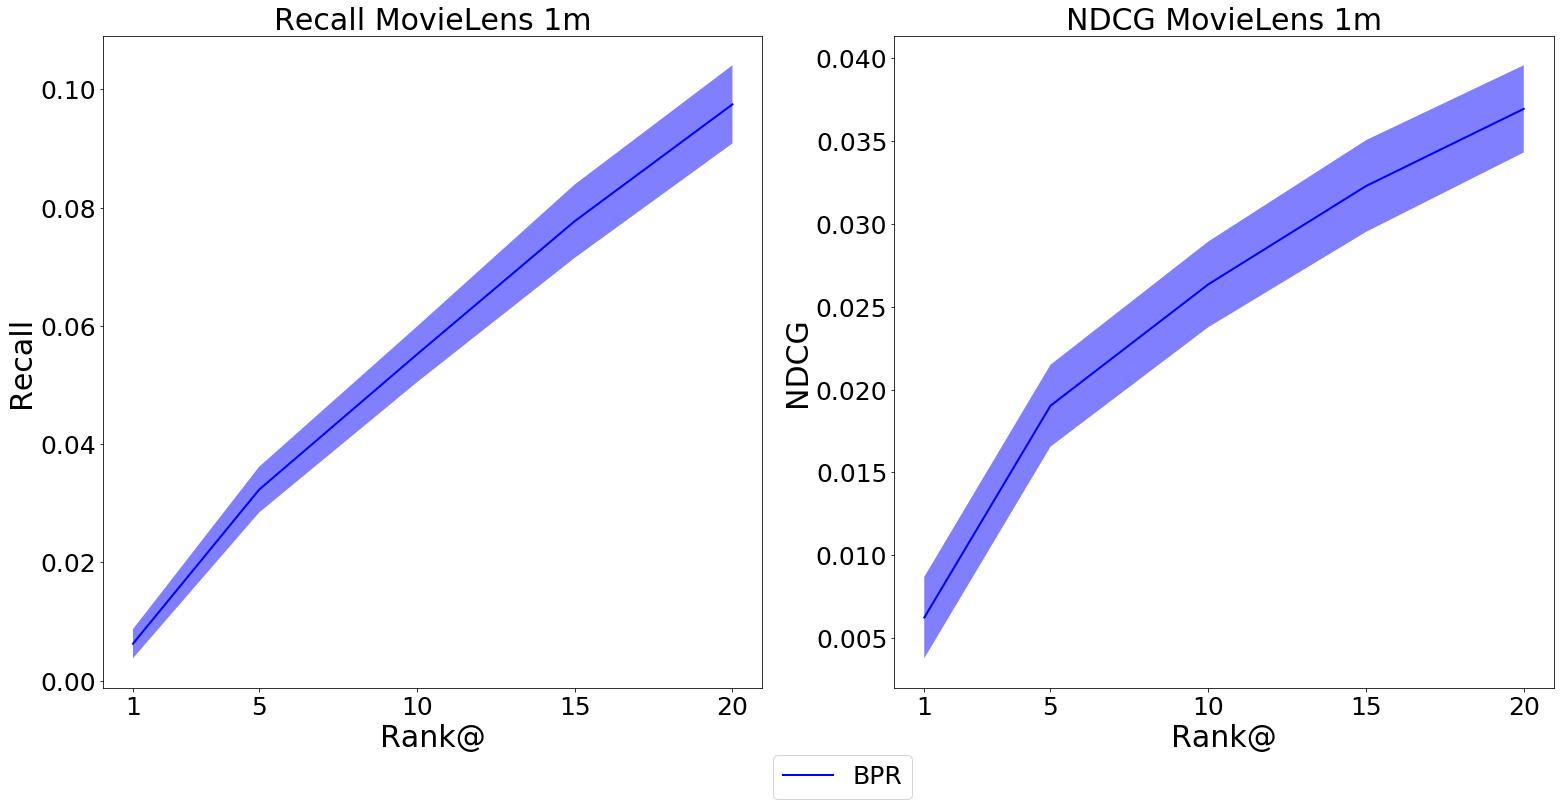

In [184]:
from visualize_results import plot_final_metrics
all_final_results = [final_metrics]
colors = ['blue']
labels = ['BPR']
metrics_to_show = ['recall', 'ndcg']
add_to_title = 'MovieLens 1m'
plot_final_metrics(all_final_results, colors, labels, metrics_to_show, add_to_title)

## Check

In [50]:
res = pd.read_pickle(path + '/Logs/final/' + file_names[2] + '_bpr_log')

In [51]:
res

,metrics,file_name,all_val_rec@10,all_val_ndcg@10,val_metrics,learning_rate,train_loss,val_auc,seed,p,q,train_time,nolf,n_iterations,sample_size,alpha,rho,sigma,reg_user,reg_item
0,rank_at hitcounts recall precision ...,am_20k_users,"[0.0, 0.0, 0.0, 0.002, 0.002, 0.004, 0.01, 0.0...","[0.0, 0.0, 0.0, 0.002, 0.002, 0.00266666666666...","[[rank_at, hitcounts, recall, precision, ndcg]...","[0.08, 0.084, 0.08820000000000001, 0.092610000...","[0.7026375671179045, 0.700187561843251, 0.6979...",[],0,"[[0.0805188350708223, -0.023256653411225573, -...","[[0.18079151946688277, -0.020297988606138365, ...",167.573700,8,25,89654.5,0.08,1.05,0.55,0.1,0.1
1,rank_at hitcounts recall precision ...,am_20k_users,"[0.0, 0.0, 0.0, 0.004, 0.006, 0.006, 0.01, 0.0...","[0.0, 0.0, 0.0, 0.003, 0.0035737674903628305, ...","[[rank_at, hitcounts, recall, precision, ndcg]...","[0.08, 0.084, 0.08820000000000001, 0.092610000...","[0.7025642390881429, 0.700212145711148, 0.6979...",[],0,"[[-0.25420011489053096, -0.26691446953668113, ...","[[0.061476413901425705, -0.326016583549483, -0...",161.185786,8,25,89654.5,0.08,1.05,0.55,0.1,0.1
2,rank_at hitcounts recall precision ...,am_20k_users,"[0.002, 0.002, 0.002, 0.002, 0.002, 0.004, 0.0...","[0.0012618595071429148, 0.002, 0.0012618595071...","[[rank_at, hitcounts, recall, precision, ndcg]...","[0.08, 0.084, 0.08820000000000001, 0.092610000...","[0.7027613761108483, 0.7000668016798978, 0.698...",[],0,"[[-0.3190539169394519, 0.329174101335778, -0.0...","[[-0.1754843615259299, 0.12505687961657277, 0....",162.910169,8,25,89654.5,0.08,1.05,0.55,0.1,0.1
3,rank_at hitcounts recall precision ...,am_20k_users,"[0.0, 0.0, 0.002, 0.002, 0.002, 0.006, 0.012, ...","[0.0, 0.0, 0.0007124143742160444, 0.002, 0.002...","[[rank_at, hitcounts, recall, precision, ndcg]...","[0.08, 0.084, 0.08820000000000001, 0.092610000...","[0.7027249055599907, 0.7002174002713082, 0.698...",[],0,"[[-0.25607660170059093, 0.23600813420760947, -...","[[0.09137671156655015, 0.1476426019654613, -0....",164.696394,8,25,89654.5,0.08,1.05,0.55,0.1,0.1
4,rank_at hitcounts recall precision ...,am_20k_users,"[0.0, 0.0, 0.0, 0.0, 0.002, 0.006, 0.01, 0.012...","[0.0, 0.0, 0.0, 0.0, 0.0012618595071429148, 0....","[[rank_at, hitcounts, recall, precision, ndcg]...","[0.08, 0.084, 0.08820000000000001, 0.092610000...","[0.7027696582652662, 0.7002208068745435, 0.698...",[],0,"[[0.03613949846118741, -0.24787622319944616, -...","[[-0.3255035351239289, -0.4001485947034766, -0...",161.831091,8,25,89654.5,0.08,1.05,0.55,0.1,0.1
5,rank_at hitcounts recall precision ...,am_20k_users,"[0.0, 0.0, 0.0, 0.002, 0.004, 0.006, 0.01, 0.0...","[0.0, 0.0, 0.0, 0.002, 0.0027737056144690833, ...","[[rank_at, hitcounts, recall, precision, ndcg]...","[0.08, 0.084, 0.08820000000000001, 0.092610000...","[0.7027871762269134, 0.7001680680597742, 0.698...",[],0,"[[0.1105971815639346, -0.41966020267039106, -0...","[[-0.10208046319153984, 0.3557107766473938, -0...",162.351702,8,25,89654.5,0.08,1.05,0.55,0.1,0.1
6,rank_at hitcounts recall precision ...,am_20k_users,"[0.0, 0.0, 0.0, 0.002, 0.004, 0.004, 0.008, 0....","[0.0, 0.0, 0.0, 0.002, 0.004, 0.004, 0.0057124...","[[rank_at, hitcounts, recall, precision, ndcg]...","[0.08, 0.084, 0.08820000000000001, 0.092610000...","[0.70280484966242, 0.7001825082440638, 0.69797...",[],0,"[[-0.011012968310260624, 0.17176332327464824, ...","[[0.2616030975762562, 0.28356439050231835, -0....",162.442423,8,25,89654.5,0.08,1.05,0.55,0.1,0.1
7,rank_at hitcounts recall precision ...,am_20k_users,"[0.0, 0.0, 0.002, 0.002, 0.002, 0.01, 0.01, 0....","[0.0, 0.0, 0.0012618595071429148, 0.002, 0.002...","[[rank_at, hitcounts, recall, precision, ndcg]...","[0.08, 0.084, 0.08820000000000001, 0.092610000...","[0.702872949407489, 0.7002111793259859, 0.6980...",[],0,"[[0.1580612746500019, 0.26955837294106216, 0.2...","[[-0.26780019294242713, 0.5410607408500364, -0...",162.799468,8,25,89654.5,0.08,1.05,0.55,0.1,0.1
8,rank_at hitcounts recall precision ...,am_20k_users,"[0.0, 